**Análisis de Datos de Captura de Pokémon**

Este código analiza los datos generados previamente en "ITBA_TP0_Creación_dataset.ipynb" para evaluar la efectividad de distintas pokébolas y cómo las propiedades mutables (HP, nivel, estado) e inmutables (como velocidad y peso) de los Pokémon afectan la probabilidad de captura.

El análisis incluye la comparación de pokébolas bajo condiciones ideales, el impacto de los estados de salud, y la visualización de cómo variables como HP y nivel influyen en la captura de Pokémon específicos.

In [29]:
!git clone https://github.com/nurbano/sia

Cloning into 'sia'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 1.49 MiB | 5.16 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [30]:
!pip install -U kaleido

In [31]:
%cd sia/tp0

/content/sia/tp0/sia/tp0


In [32]:
!ls

pokemon.csv		pokemon_ruido.csv  TP0_análisis_de_datos.ipynb
pokemon_inmutables.csv	readme.MD	   TP0_Creación_dataset.ipynb


In [33]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

##Leo el dataset generado

In [34]:
df= pd.read_csv("pokemon.csv", index_col= 0)

In [35]:
df.head()

,Pokemon,Ball,Level,Hp,Status,Prob
0,jolteon,pokeball,0,0.0000,BURN,0.239458
1,jolteon,pokeball,0,0.1000,BURN,0.259885
2,jolteon,pokeball,0,0.2000,BURN,0.231825
3,jolteon,pokeball,0,0.2998,BURN,0.214324
4,jolteon,pokeball,0,0.4000,BURN,0.207360


##Separo el dataset por cada pokemon, utilizando los filtros de pandas.

In [36]:
df.Pokemon.unique()

array(['jolteon', 'caterpie', 'snorlax', 'onix', 'mewtwo'], dtype=object)

In [37]:
df_jolteon= df[df.Pokemon=='jolteon']
df_caterpie= df[df.Pokemon=='caterpie']
df_snorlax= df[df.Pokemon=='snorlax']
df_onix= df[df.Pokemon=='onix']
df_mewtwo= df[df.Pokemon=='mewtwo']

##Respuestas a preguntas Guía

1. Acerca de pokebolas:

a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales
(HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

Como demonstró en el Notebook de Creación de dataset, la probabilidad no depende de la cantidad de veces que se ejecute la captura. Para contestar esta pregunta, se filtra en el dataset completo (todos los pokemons) a las condiciones ideales HP:1 Level=100 y Status None. Luego se calcula el histograma de probabilidad de cada una.

In [38]:
df_aux= df[(df.Hp==1) & (df.Status=="NONE") & (df.Level==100)]

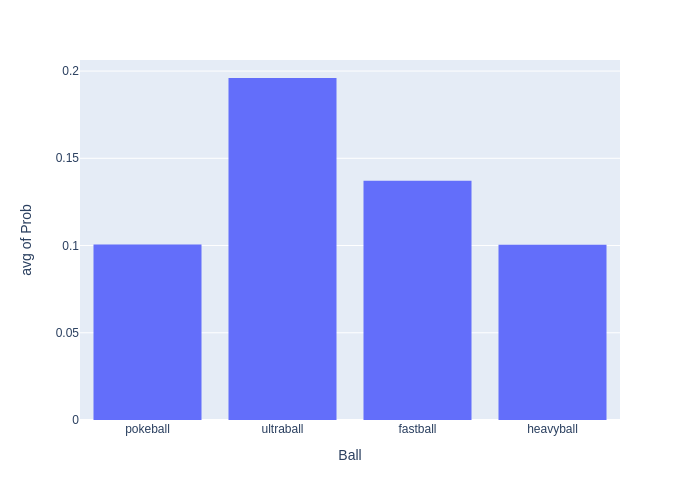

In [39]:
fig = px.histogram(df_aux, x="Ball", y="Prob", histfunc='avg')
fig.show("png")


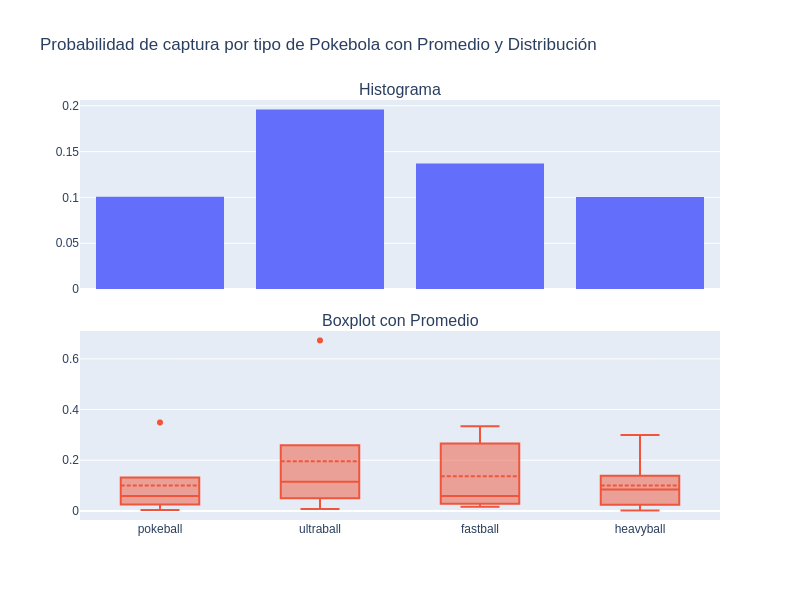

In [40]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Se Crea la figura con subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1, subplot_titles=("Histograma", "Boxplot con Promedio"))

# Se agrega el histograma en la primera fila
fig.add_trace(
    go.Histogram(x=df_aux['Ball'], y=df_aux['Prob'], histfunc='avg', name='Promedio de Probabilidad'),
    row=1, col=1
)

# SeAgrega el boxplot en la segunda fila
fig.add_trace(
    go.Box(x=df_aux['Ball'], y=df_aux['Prob'], name='Distribución de Probabilidad', boxmean=True),
    row=2, col=1
)

# Se actualiza el diseño de la figura
fig.update_layout(height=600, width=800, title_text="Probabilidad de captura por tipo de Pokebola con Promedio y Distribución",
                  showlegend=False)

fig.show("png")


**Análisis del boxplot**
Fastball es la más efectiva pero con mucha variabilidad. Ultraball es una opción más confiable. Pokeball y Heavyball son las menos efectivas y muestran poca variabilidad, lo que significa que no son buenas opciones para capturar Pokémon.

b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justificar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la
efectividad de la Pokebola básica para cada Pokemon

Para esta respuesta es necesario visualizar las propiedades inmutables de cada pokemon.

In [41]:
df_inm= pd.read_csv("pokemon_inmutables.csv", index_col=0)

In [42]:
df_inm

,pokemon,type1,type2,base_hp,attack,defense,sp_attack,Sp_defense,speed,weight,catch_rate
0,jolteon,ELECTRIC,NONE,65,65,60,110,95,130,54.0,45
1,caterpie,BUG,NONE,45,30,35,20,20,45,6.4,255
2,snorlax,NORMAL,NONE,160,110,65,65,110,30,1014.1,25
3,onix,ROCK,GROUND,35,45,160,30,45,70,463.0,45
4,mewtwo,PSYCHIC,NONE,106,110,90,154,90,130,269.0,3


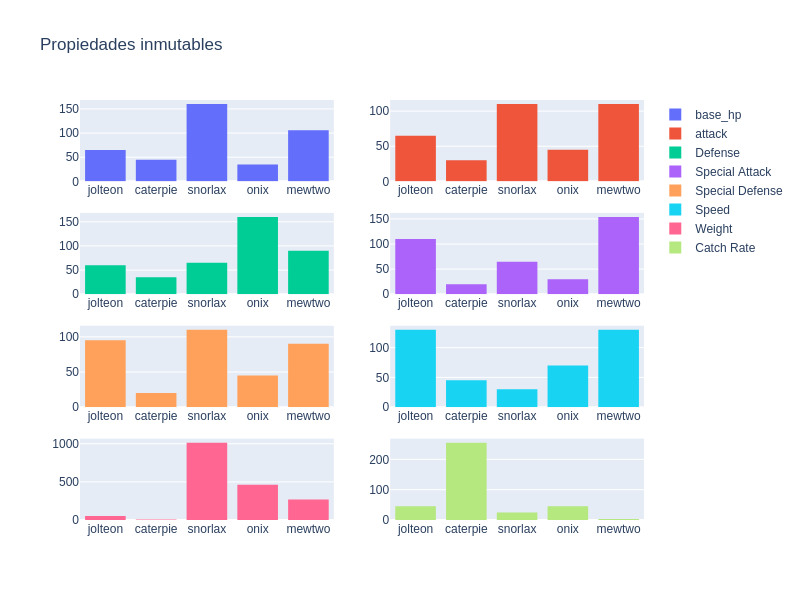

In [43]:

fig = make_subplots(rows=4, cols=2)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.base_hp, histfunc='avg',name="base_hp" ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.attack, histfunc='avg', name= "attack"),
    row=1, col=2,
)
fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.defense, histfunc='avg', name="Defense"),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.sp_attack, histfunc='avg', name="Special Attack"),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.Sp_defense, histfunc='avg', name="Special Defense"),
    row=3, col=1
)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.speed, histfunc='avg', name="Speed"),
    row=3, col=2
)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.weight, histfunc='avg', name="Weight"),
    row=4, col=1
)

fig.add_trace(
    go.Histogram(x=df_inm.pokemon, y=df_inm.catch_rate, histfunc='avg', name="Catch Rate"),
    row=4, col=2
)

fig.update_layout(height=600, width=800, title_text="Propiedades inmutables")
fig.show("png")

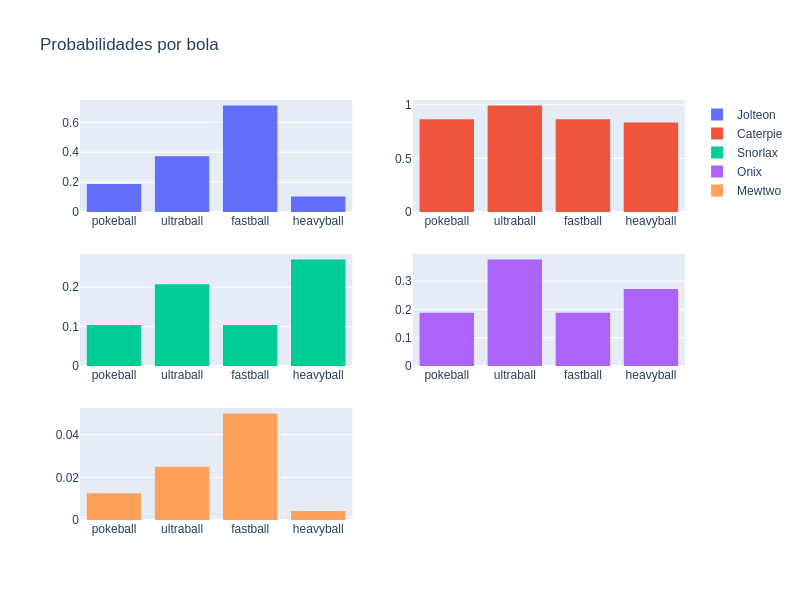

In [44]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(
    go.Histogram(x=df_jolteon.Ball, y=df_jolteon.Prob, histfunc='avg', name="Jolteon"),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df_caterpie.Ball, y=df_caterpie.Prob, histfunc='avg', name="Caterpie"),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df_snorlax.Ball, y=df_snorlax.Prob, histfunc='avg', name="Snorlax"),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=df_onix.Ball, y=df_onix.Prob, histfunc='avg', name="Onix"),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x=df_mewtwo.Ball, y=df_mewtwo.Prob, histfunc='avg', name="Mewtwo"),
    row=3, col=1
)
fig.update_layout(height=600, width=800, title_text="Probabilidades por bola")

fig.show("png")

Observaciones:
- Se observa que meotow y jolteon son los más veloces. Ambos tienen más probabilidad de captura con las fastball (bola rápida).
- Snorlax es el pokemon más pesasdo y tiene mayor probabildad de captura con la heavyball (bola pesada).
- Onix es el que tiene más defensa y tiene más probabilidad de captura con la ultraball.
- Snorlax, meotow, jolteon y onix tienen bajo rate de captura, y en todos los casos, la mejor bola  o la segunda bola es la últraball. Por lo tanto, se puede decir que la ultraball es mejor para atrapar pokemones con bajo catch rate que la pokeball.

2. Acerca del estado del Pokemon:
a) ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si
es así, ¿Cuál es más o menos efectiva?

In [45]:
df_aux= df[(df.Hp==1) & (df.Level==100)]

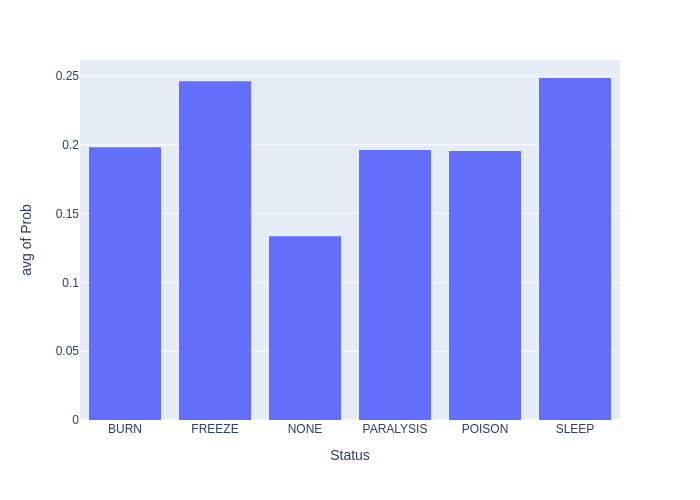

In [46]:
fig = px.histogram(df_aux, x="Status", y="Prob", histfunc='avg')
fig.show("png")

**Las mejores condiciones de salud para atrapar pokemones son Sleep y Freeze. Luego en orden viene Burn, Paralysis y poison, con probabilidades imilares. Y el peor estado en la condición None (Sin ninguna afección).**

b) ¿Cómo afectan los puntos de vida a la efectividad de la captura?
Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros
constantes, calcular la probabilidad de captura para distintos HP %

In [47]:
df_jolteon_vida= df_jolteon[(df.Status=="NONE") & (df.Level==100)]
df_mewtwo_vida= df_mewtwo[(df.Status=="NONE") & (df.Level==100)]

<ipython-input-47-f40b03923ca2>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-47-f40b03923ca2>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [48]:
df_jolteon_vida[df.Ball=="pokeball"].describe()

<ipython-input-48-77919c52cab3>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Level,Hp,Prob
count,11.0,11.000000,11.000000
mean,100.0,0.499918,0.117116
std,0.0,0.331644,0.037126
min,100.0,0.000000,0.059351
25%,100.0,0.249900,0.090886
50%,100.0,0.500000,0.120392
75%,100.0,0.749850,0.143037
max,100.0,1.000000,0.172296


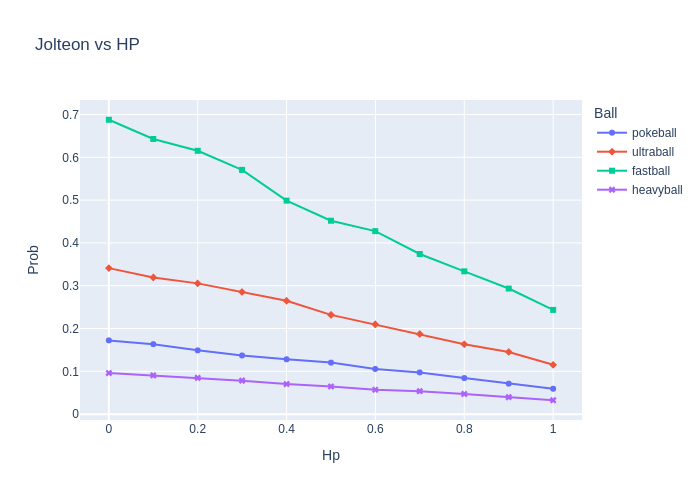

In [49]:
fig= px.line(df_jolteon_vida, x="Hp", y= "Prob", color= "Ball", symbol= "Ball", title= "Jolteon vs HP" )
fig.show("png")

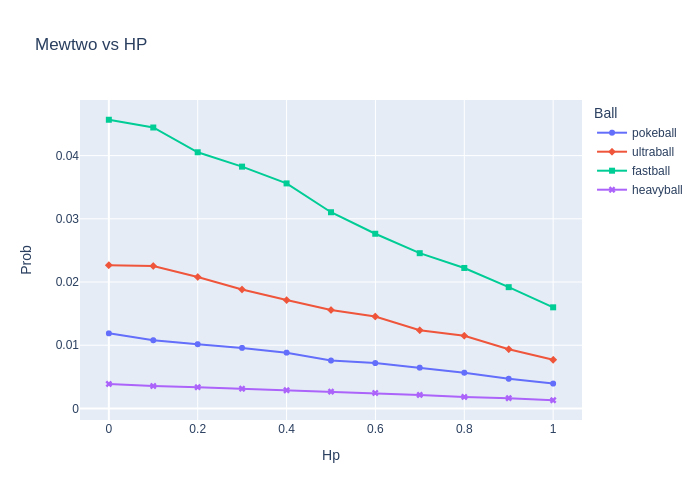

In [50]:
fig= px.line(df_mewtwo_vida, x="Hp", y= "Prob", color= "Ball", symbol= "Ball", title= "Mewtwo vs HP" )
fig.show("png")

**Se evaluaó a Jolteon y Mewtwo con diferentes bolas, en todos los casos se observa que medida que la vida incrementa la probabilidad de captura disminuye.**

También se puede utilzar el dataset con ruido 0.10 para analizar el comportamiento.

In [51]:
df_ruido= pd.read_csv("pokemon_ruido.csv", index_col= 0)
df_jolteon_ruido= df_ruido[df_ruido.Pokemon=='jolteon']

In [52]:
df_aux= df_jolteon_ruido[(df_jolteon_ruido.Status=='NONE') & (df_jolteon_ruido.Level==100)] #Tomamos Level constante en 100 y Status constante en NONE

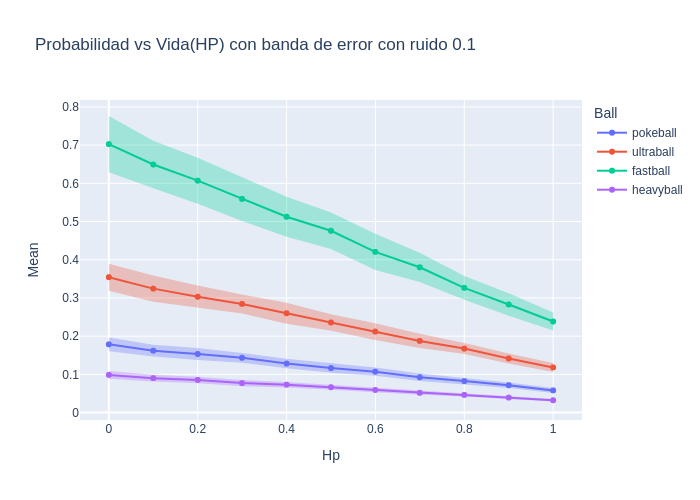

In [53]:
def line(error_y_mode=None, **kwargs):
    """Extension of `plotly.express.line` to use error bands."""
    ERROR_MODES = {'bar','band','bars','bands',None}
    if error_y_mode not in ERROR_MODES:
        raise ValueError(f"'error_y_mode' must be one of {ERROR_MODES}, received {repr(error_y_mode)}.")
    if error_y_mode in {'bar','bars',None}:
        fig = px.line(**kwargs)
    elif error_y_mode in {'band','bands'}:
        if 'error_y' not in kwargs:
            raise ValueError(f"If you provide argument 'error_y_mode' you must also provide 'error_y'.")
        figure_with_error_bars = px.line(**kwargs)
        fig = px.line(**{arg: val for arg,val in kwargs.items() if arg != 'error_y'})
        for data in figure_with_error_bars.data:
            x = list(data['x'])
            y_upper = list(data['y'] + data['error_y']['array'])
            y_lower = list(data['y'] - data['error_y']['array'] if data['error_y']['arrayminus'] is None else data['y'] - data['error_y']['arrayminus'])
            color = f"rgba({tuple(int(data['line']['color'].lstrip('#')[i:i+2], 16) for i in (0, 2, 4))},.3)".replace('((','(').replace('),',',').replace(' ','')
            fig.add_trace(
                go.Scatter(
                    x = x+x[::-1],
                    y = y_upper+y_lower[::-1],
                    fill = 'toself',
                    fillcolor = color,
                    line = dict(
                        color = 'rgba(255,255,255,0)'
                    ),
                    hoverinfo = "skip",
                    showlegend = False,
                    legendgroup = data['legendgroup'],
                    xaxis = data['xaxis'],
                    yaxis = data['yaxis'],
                )
            )
        # Reorder data as said here: https://stackoverflow.com/a/66854398/8849755
        reordered_data = []
        for i in range(int(len(fig.data)/2)):
            reordered_data.append(fig.data[i+int(len(fig.data)/2)])
            reordered_data.append(fig.data[i])
        fig.data = tuple(reordered_data)
    return fig

for error_y_mode in {'band'}:
    fig = line(
        data_frame = df_aux,
        x = 'Hp',
        y = 'Mean',
        error_y = 'Std',
        error_y_mode = error_y_mode,
        color = 'Ball',
        title = f'Probabilidad vs Vida(HP) con banda de error con ruido 0.1',
        markers = '.',
    )
    fig.show("png")

Este gráfico muestra cómo la probabilidad de captura de un Pokémon disminuye a medida que su HP aumenta, usando diferentes tipos de pokébolas bajo un ruido del 10%.



*   **Fastball (línea verde)** es la más efectiva, pero tiene una alta variabilidad, como se indica por la banda de error ancha. Esta banda representa la desviación estándar de la probabilidad, mostrando que la efectividad de la Fastball puede variar significativamente.
*   **Ultraball (línea roja)** es la segunda más efectiva y más consistente, con una banda de error más estrecha, lo que indica menor variabilidad y mayor fiabilidad.
*   **Pokeball (línea azul) y Heavyball (línea violeta)** son las menos efectivas, con una banda de error más estrecha, indicando poca variabilidad y baja efectividad constante.










c) ¿Qué parámetros son los que más afectan la probabilidad de captura?

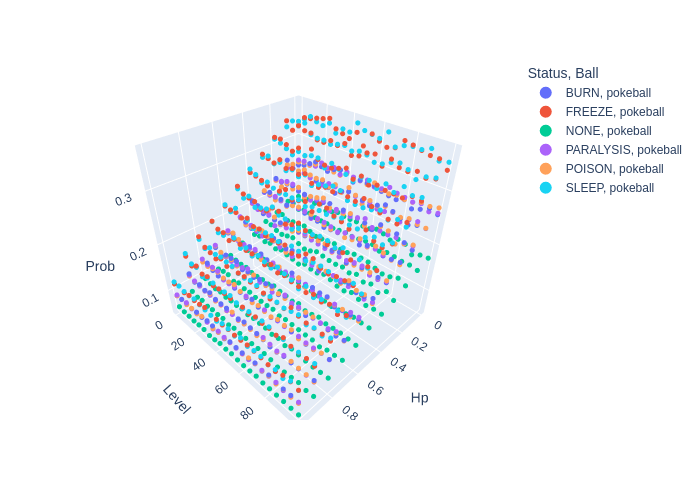

In [54]:
fig = px.scatter_3d(df_jolteon[df_jolteon.Ball=="pokeball"], x= "Hp", y= "Level", z= "Prob", symbol= "Ball", color= "Status")
fig.update_traces(marker=dict(size=3))
fig.update_layout(legend= {'itemsizing': 'constant'})
fig.show("png")

In [55]:
df_jolteon_level= df_jolteon[(df.Status=="NONE") & (df.Hp==1)]
df_mewtwo_level= df_mewtwo[(df.Status=="NONE") & (df.Hp==1)]
df_jolteon_status= df_jolteon[(df.Hp==1) & (df.Level==100)]
df_mewtwo_status= df_mewtwo[(df.Hp==1) & (df.Level==100)]

<ipython-input-55-71f0f32da043>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-55-71f0f32da043>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-55-71f0f32da043>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-55-71f0f32da043>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



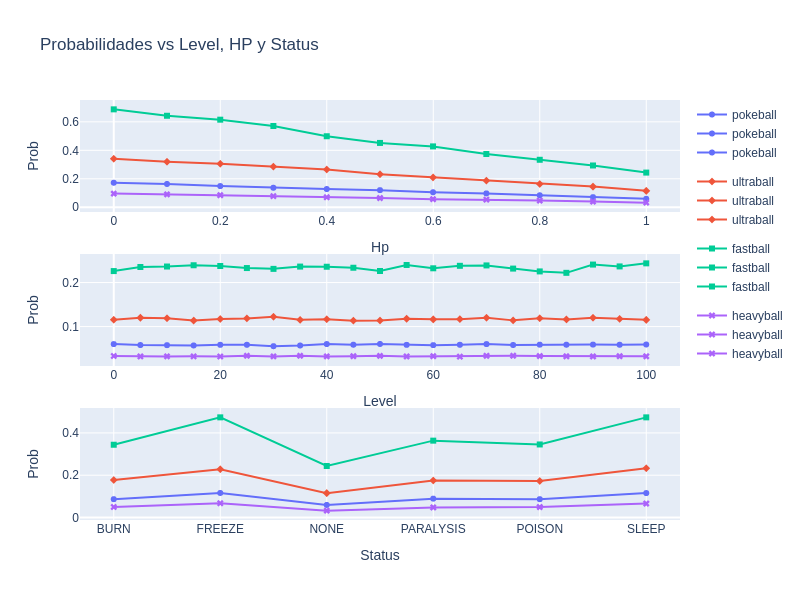

In [56]:
fig = make_subplots(rows=3, cols=1)

trace1= px.line(df_jolteon_vida, x="Hp", y= "Prob", color= "Ball", symbol= "Ball", title= "Jolteon vs HP" )
trace2= px.line(df_jolteon_level, x="Level", y= "Prob", color= "Ball", symbol= "Ball", title= "Jolteon vs Level" )
trace3= px.line(df_jolteon_status, x="Status", y= "Prob", color= "Ball", symbol= "Ball", title= "Jolteon vs Status" )
fig.add_trace(
  trace1.data[0],
    row=1, col=1
)
fig.add_trace(
  trace1.data[1],
    row=1, col=1
)
fig.add_trace(
  trace1.data[2],
    row=1, col=1
)
fig.add_trace(
  trace1.data[3],
    row=1, col=1
)
fig.add_trace(
   trace2.data[0],
    row=2, col=1
)
fig.add_trace(
  trace2.data[1],
    row=2, col=1
)
fig.add_trace(
  trace2.data[2],
    row=2, col=1
)
fig.add_trace(
  trace2.data[3],
    row=2, col=1
)
fig.add_trace(
 trace3.data[0],
    row=3, col=1
)
fig.add_trace(
  trace3.data[1],
    row=3, col=1
)
fig.add_trace(
  trace3.data[2],
    row=3, col=1
)
fig.add_trace(
  trace3.data[3],
    row=3, col=1
)
fig.update_layout(height=600, width=800, title_text="Probabilidades vs Level, HP y Status")
fig.update_xaxes(title_text="Hp", row = 1, col = 1)
fig.update_xaxes(title_text="Level", row = 2, col = 1)
fig.update_xaxes(title_text="Status", row = 3, col = 1)

fig.update_yaxes(title_text="Prob")
fig.show("png")

 **Viendo el scatter de 3 dimensiones obtenemos las siguientes conclusiones:
 La mayor pendiende de descenso la tenemos con la variación de HP, a medida que HP es mayor, la probabilidad de captura disminuye. En el caso del nivel de pokemon, la variación es casi nula. El otro parámetro importante es el estado del pokemon. Como se dijo atenrioremente si está dormido o freezado tenemos mucha más probabilidad de atraparlo que si está en estado normal (NONE).**
 Esto también se puede observar en las gráficas de variabilidad de HP, Level y Status vs Prob.



**d) ¿Qué combinación de condiciones (propiedades mutables) y pokébola conviene utilizar para capturar un Pokémon?**

Analizando el gráfico, podemos ver las siguientes tendencias para Jolteon:

*   Pokébola: La Fastball (línea verde) es claramente la mejor opción, ya que tiene la mayor probabilidad de captura en todas las condiciones analizadas.
*   HP: Mantener el HP lo más bajo posible (cerca de 0) maximiza la probabilidad de captura.
*   Estado: Los estados Freeze y Sleep ofrecen las mayores probabilidades de captura, por lo que inducir estos estados en el Pokémon es ideal.

En resumen, para capturar a Jolteon de manera efectiva, la combinación ideal es usar una Fastball cuando el Pokémon tiene bajo HP y está en estado Freeze o Sleep.

**e) ¿Sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del Pokémon más bajo (o más alto)?**


*   Nivel Bajo: Como se observa en el gráfico de probabilidad vs. nivel, el nivel del Pokémon tiene una influencia mínima en la probabilidad de captura cuando se utilizan las combinaciones óptimas de HP bajo y estado Freeze o Sleep. Esto sugiere que, incluso con un nivel más bajo, las conclusiones anteriores siguen siendo válidas: Fastball, bajo HP, y Freeze/Sleep son la combinación más efectiva.
*   Nivel Alto: Al aumentar el nivel, la probabilidad de captura se mantiene similar, especialmente para Fastball. Esto refuerza que el nivel del Pokémon no cambia drásticamente la estrategia óptima de captura, aunque podría requerir más intentos debido a la mayor resistencia del Pokémon.


En resumen, la combinación de Fastball, bajo HP, y estado Freeze o Sleep sigue siendo la más efectiva tanto para niveles bajos como altos de Jolteon. El nivel del Pokémon no afecta significativamente esta estrategia, por lo que es consistente en diferentes situaciones.








